http://intellspot.com/linear-regression-examples/

In [50]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [45]:
data = './7onlinestores.data' #Data URL
df = pd.read_csv(data, sep='|', header = None ) 
df

,0,1
0,368,1.7
1,340,1.5
2,665,2.8
3,954,5.0
4,331,1.3
5,556,2.2
6,376,1.3


In [46]:
df.columns = [
    'MonthlyE-commerceSales(in1000s)', 'OnlineAdvertisingDollars(1000s)'] 
df.head()

,MonthlyE-commerceSales(in1000s),OnlineAdvertisingDollars(1000s)
0,368,1.7
1,340,1.5
2,665,2.8
3,954,5.0
4,331,1.3


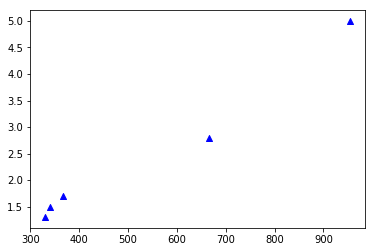

In [44]:
x_data = np.array([368, 340,665, 954, 331])
y_data = np.array([1.7, 1.5,2.8,5.0,1.3])

plt.scatter(x_data,y_data, color = 'b', marker="^")
plt.show()

In [48]:
data = './7onlinestores.data' #Data URL
df = pd.read_csv(data, sep='|', header = None ) 
df

,0,1
0,368,1.7
1,340,1.5
2,665,2.8
3,954,5.0
4,331,1.3
5,556,2.2
6,376,1.3


In [56]:
raw_X = df[1].values.reshape(-1, 1)
y = df[0].values

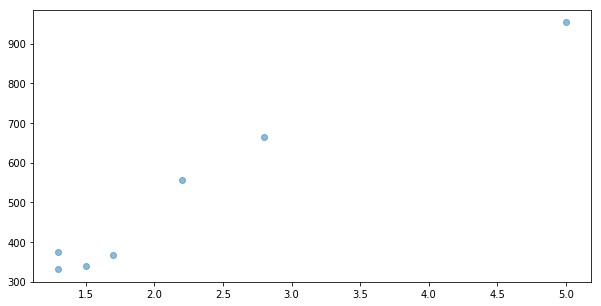

In [57]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [54]:
raw_X[:5], y[:5]

(array([[368],
        [340],
        [665],
        [954],
        [331]], dtype=int64), array([1.7, 1.5, 2.8, 5. , 1.3]))

In [55]:
np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [90]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[1., 4.],
       [1., 4.],
       [1., 5.],
       [1., 5.],
       [1., 7.]])

In [65]:
w = np.random.normal((2,1))
#w = np.array([5,3])
w

array([1.8347582 , 2.31795935])

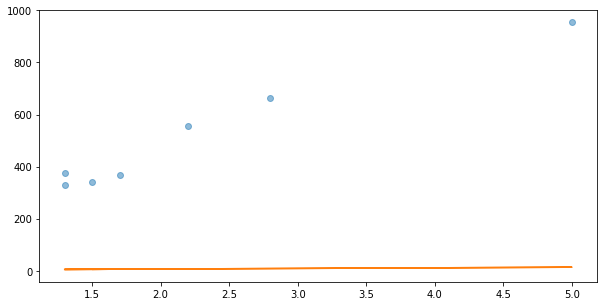

In [67]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
y_predict
plt.plot(raw_X, y, "o", alpha=0.5)
plt.plot(raw_X, y_predict)

In [68]:
y_predict

array([ 5.77528909,  5.31169722,  8.32504437, 13.42455493,  4.84810535,
        6.93426876,  4.84810535])

---



In [74]:
data = './usedcarssold.data' #Data URL
df = pd.read_csv(data, sep='\s+', header = None ) 
df

,0,1
0,4,6300
1,4,5800
2,5,5700
3,5,4500
4,7,4500
5,7,4200
6,8,4100
7,9,3100
8,10,2100
9,11,2500


In [79]:
raw_X = df[0].values.reshape(-1, 1)
y = df[1].values

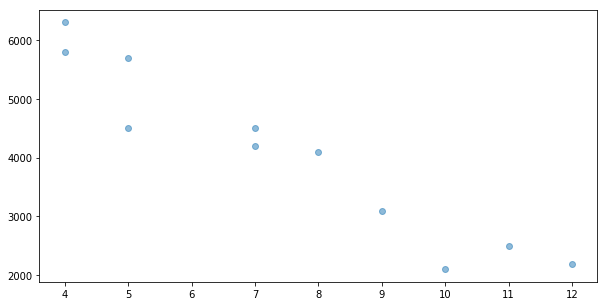

In [80]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [85]:
np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [88]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[1., 4.],
       [1., 4.],
       [1., 5.],
       [1., 5.],
       [1., 7.]])

In [91]:
w = np.random.normal((2,1))
#w = np.array([5,3])
w

array([ 0.0665004 , -0.15904488])

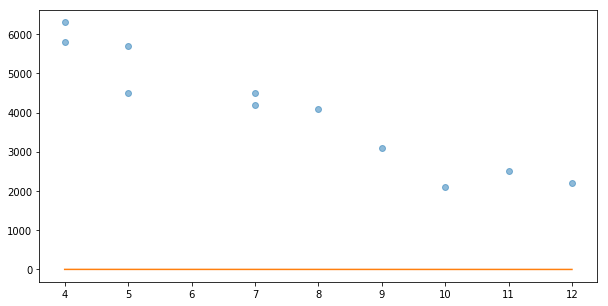

In [92]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
y_predict
plt.plot(raw_X, y, "o", alpha=0.5)
plt.plot(raw_X, y_predict)

* 액셀로도됨
https://blog.udemy.com/linear-regression-example/

https://towardsdatascience.com/linear-regression-with-example-8daf6205bd49

In [1]:
# sales of vehicle as a function of GDP (for India)

import collections

stepSize = 0.01


def read_data() :
    data = open("vehicle_sale_data" , "r")
    gdp_sale = collections.OrderedDict()
    for line in data.readlines()[1:] :
        record = line.split(",")
        gdp_sale[float(record[1])] = float(record[2].replace('\n', ""))

    return gdp_sale


def sale_for_data(constant, slope, data):
    return constant + slope * data   # y = c + ax format


def step_cost_function_for(gdp_sale, constant, slope) :
    global stepSize
    diff_sum_constant = 0 # diff of sum for constant 'c' in "c + ax" equation
    diff_sum_slope = 0  # diff of sum for 'a' in "c + ax" equation
    gdp_for_years = list(gdp_sale.keys())

    for year_gdp in gdp_for_years: # for each year's gdp in the sample data
        # get the sale for given 'c' and 'a'by giving the GDP for this sample record
        trg_data_sale = sale_for_data(constant, slope, year_gdp) # calculated sale for current 'c' and 'a'
        a_year_sale = gdp_sale.get(year_gdp) # real sale for this record
        diff_sum_slope = diff_sum_slope + ((trg_data_sale - a_year_sale) * year_gdp) # slope's (h(y) - y) * x
        diff_sum_constant = diff_sum_constant + (trg_data_sale - a_year_sale) # consant's (h(y) - y)

    step_for_constant = (stepSize / len(gdp_sale)) * diff_sum_constant # distance to be moved by c
    step_for_slope = (stepSize / len(gdp_sale)) * diff_sum_slope # distance to be moved by a
    new_constant = constant - step_for_constant # new c
    new_slope = slope - step_for_slope # new a

    return new_constant, new_slope


def get_weights(gdp_sale) :
    constant = 1
    slope = 1
    accepted_diff = 0.01

    while 1 == 1:  # continue till we reach local minimum
        new_constant, new_slope = step_cost_function_for(gdp_sale, constant, slope)
        # if the diff is too less then lets break
        if (abs(constant - new_constant) <= accepted_diff) and (abs(slope - new_slope) <= accepted_diff):
            print "done. Diff is less than " + str(accepted_diff)
            return new_constant, new_slope
        else:
            constant = new_constant
            slope = new_slope
            print "new values for constant and slope are " + str(new_constant) + ", " + \
                  str(new_slope)


def main():
    contant, slope = get_weights(read_data())
    print "constant :" + contant + ", slope:" + slope

if __name__ == '__main__':
    main()

SyntaxError: invalid syntax (<ipython-input-1-9d32f7b4df76>, line 52)

In [2]:
year,GDP,4wheeler_passengar_vehicle_sale(in lakhs)
2011,6.2,26.3
2012,6.5,26.65
2013,5.48,25.03
2014,6.54,26.01
2015,7.18,27.9
2016,7.93,30.47

SyntaxError: invalid syntax (<ipython-input-2-14f5f6551f01>, line 1)

In [26]:
import pandas as pd
import collections
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

gdp_data = []
interest_rate_data = []
sales_data = []

def read_data() :
    
   # data = pd.read_csv('./vehicle_sale_data.csv' , 'r')
  # https://raw.githubusercontent.com/skhurana333/ml/master/vehicle_sale_data
    data = 'https://raw.githubusercontent.com/skhurana333/ml/master/vehicle_sale_data'
    #data = open("vehicle_sale_data" , "r")
    gdp_sale = collections.OrderedDict()
    for line in data.readlines()[1:] :
        record = line.split(",")
        gdp_sale[float(record[1])] = float(record[2].replace('\n', ""))
    return gdp_sale


NameError: name 'gdp_sale' is not defined

In [15]:
import collections
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

gdp_data = []
interest_rate_data = []
sales_data = []


def read_data():
    # the dictionary will have gdp as key and
    # format of the file ---> year,gdp,loan_interest_rate,sale
    data = open("vehicle_sale_data_multivariate", "r")
    sale_gdp_interest_rate = collections.OrderedDict()
    for line in data.readlines()[1:] :
        record = line.split(",")
        sales_data.append(float(record[1].replace('\n', "")))
        gdp_data.append(float(record[2]))
        interest_rate_data.append(float(record[3]))


# draw graph of sample data
def draw_graph():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(gdp_data, interest_rate_data, sales_data, 'ro', label='Vehicle sales data')
    ax.legend()
    plt.show()


def createModel():
    global gdp_data
    global interest_rate_data
    global sales_data

    # since we have 2 variables (gdp as x1 and auto loan interest rate as x2) the equation format will be
    # y = c + w1*x1 + w2*x2,  c is also called bias

    w1 = tf.Variable(tf.ones(1.0, 1.0), name="w1", dtype="float")  # add to graph, initialize to 1
    w2 = tf.Variable(tf.ones(1.0, 1.0), name="w2", dtype="float")  # add to graph, initialize to 1
    b = tf.Variable(tf.ones(1.0), name="b", dtype="float") # add to graph, initialize to 1

    X1 = tf.placeholder(tf.float32, [None,1], name="x1") #placeholder means its value has to be fed later and value has to be of float type
    X2 = tf.placeholder(tf.float32, [None,1], name="x2")

    # we multiply X and W as in w1*x1 + w2*x2 and we add bias (i.e.constant C to this )
    model_equation = tf.matmul(X1, w1) + tf.matmul(X2, w2) + b

    # remember cost function equation ? ->  (1/2m) summation(from 1 to m) of (hx - y)^2 and objective is to
    # minimize it
    # reduce_sum - calculates the sum of elements across dimensions. Since we will be pumping data for x1, x2 and
    # real value y,it will keep calculating the sum for these equation for each of the values and sum it up.
    # The 'summation' from cost function, this is what reduce_sum does.
    cost_function = tf.reduce_sum(tf.pow(model_equation - Y, 2))/(2 * len(gdp_data)) # len(gdp_data) tells the size of input data i.e. m

    # we will take step of 0.01 size and want this cost function to be minimized i.e.
    # we want the difference between sample (training) set and real value to be minimal
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost_function)

    initState = tf.global_variables_initializer() # initialize variables, we had set weight and bias in the graph above

    # magic starts
    with tf.Session() as session:
        cost = 0.0
        session.run(initState)
        for iteration in range(20):
            for(x1, x2, y) in zip(gdp_data, interest_rate_data, sales_data):
                session.run(optimizer, feed_dict = {X1: x1, X2: x2, Y: y}) # here we feed data
                newcost = session.run(cost_function, feed_dict={X1: gdp_data, X2: interest_rate_data, Y: sales_data})
                print "cost : " + str(newcost) + ",W1=" + str(session.run(w1)) + \
                      ",W2=" + str(session.run(w2)) + ",c=" + str(session.run(bias))

        return str(session.run(w1)), str(session.run(w2)),  str(session.run(bias))

def main():
    read_data()
    w1, w2, c = createModel()
    print "values of w1 : " + str(w1) + ", w2: " + str(w2) + ", c: " + str(c)
    draw_graph()

main()

# refernce - https://blog.altoros.com/using-linear-regression-in-tensorflow.html

SyntaxError: invalid syntax (<ipython-input-15-7b4019e434d2>, line 72)

In [17]:
import collections
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

gdp_data = []
interest_rate_data = []
sales_data = []

In [18]:
def read_data():
    # the dictionary will have gdp as key and
    # format of the file ---> year,gdp,loan_interest_rate,sale
    data = open("vehicle_sale_data_multivariate", "r")
    sale_gdp_interest_rate = collections.OrderedDict()
    for line in data.readlines()[1:] :
        record = line.split(",")
        sales_data.append(float(record[1].replace('\n', "")))
        gdp_data.append(float(record[2]))
        interest_rate_data.append(float(record[3]))

